# Integración de ecuaciones hidrostaticas en RG y Newton

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import astropy.constants as const

## Newtonian

In [16]:
# Constants and parameters
G = const.G.value
M = const.M_sun.value
R = const.R_sun.value
c = const.c.value
rho_0 = 1.5e5 # data from the sun (web)
P_0 = 2.5e16 # data from the sun (web)

k = 1
gamma = 2

In [3]:
# Define the ODEs
def NewtOdes(x, r, gamma):
    a = rho_0*R**3/M
    b = rho_0/P_0*M/R
    l = M/R
    mu = rho_0**gamma/P_0*k


    # Variables
    rho, m, phi = x

    # ODEs
    # drho_dr = -b/mu/gamma * G*rho**(2-gamma)*m/r**2
    # dm_dr = 4*np.pi*a*r**2*rho
    # dphi_dr = l*G/c**2*m/r**2
    drho_dr = -1/gamma * rho**(2-gamma)*m/r**2
    dm_dr = r**2*rho
    dphi_dr = m/r**2

    return [drho_dr, dm_dr, dphi_dr]

In [4]:
# integration range
rf = 100.0
#NN = 1000
dx = 1e-3 # es mejor definir el dx que el numero de puntos
NN = int((rf)/dx)
r = np.linspace(dx, rf, NN)

# initial conditions
rho_0 = 1.0 - dx**2/(6*gamma) # density at dx from the center
m_0 = dx**3/3 # mass at dx from the center
phi_0 = 0
x_0 = [rho_0, m_0, phi_0]

# solve ODE
x = odeint(NewtOdes, x_0, r, args=(2.5,))

C:\Users\nicom\AppData\Local\Temp\ipykernel_25328\2869603266.py:16: RuntimeWarning: invalid value encountered in scalar power
  drho_dr = -1/gamma * rho**(2-gamma)*m/r**2
c:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\_odepack_py.py:248: ODEintWarning: Excess accuracy requested (tolerances too small). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


R=3.70700 rho=nan


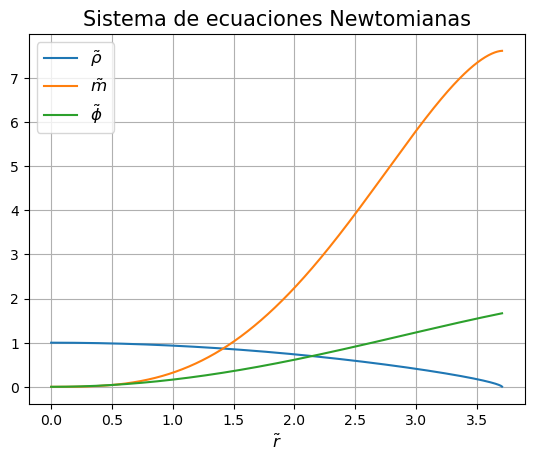

In [5]:
# search the x where rho = 0
lim = len(r)
for i in range(len(x[:,0])):
    if x[i,0] <= 0:
        # print(r[i], x[i,0])
        lim = i
        break

# print(r[lim], x[lim,0])
print('R={:.5f} rho={:.5f}'.format(r[lim-1], x[lim-1,0]))

# plot
plt.plot(r[:lim], x[:lim,0], label=r'$\tilde{\rho}$')
plt.plot(r[:lim], x[:lim,1], label=r'$\tilde{m}$')
plt.plot(r[:lim], x[:lim,2], label=r'$\tilde{\phi}$')
# plt.plot(r, k*(x[:,0])**gamma, label='P')
# plt.plot(r, x[:,0], label='rho')
# plt.plot(r, x[:,1], label='m')
# plt.plot(r, x[:,2], label='phi')
# plt.plot(r, k*(x[:,0])**gamma, label='P')
plt.xlabel('$\\tilde{r}$', fontsize=12)
plt.title('Sistema de ecuaciones Newtomianas', fontsize=15)
plt.legend(fontsize=12)
plt.grid()
plt.show()

In [7]:
# considerig different gamma
gammas = np.arange(0.8, 1.7, 0.1)
xi = [odeint(NewtOdes, x_0, r, args=(i,)) for i in gammas]

C:\Users\nicom\AppData\Local\Temp\ipykernel_25328\2869603266.py:16: RuntimeWarning: invalid value encountered in scalar power
  drho_dr = -1/gamma * rho**(2-gamma)*m/r**2
c:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\_odepack_py.py:248: ODEintWarning: Excess accuracy requested (tolerances too small). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


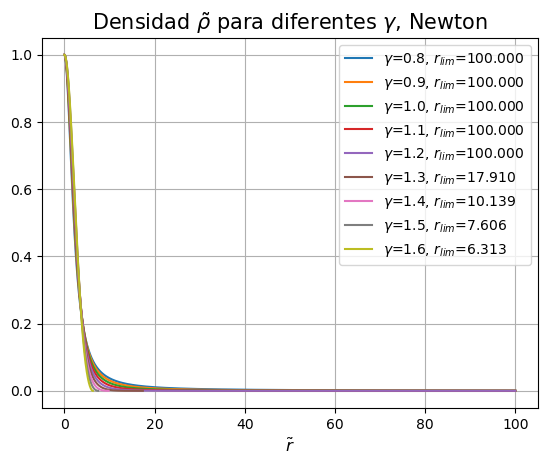

In [8]:
# plot for different gamma
for i in range(len(xi)):
    # search the x where rho = 0
    lim_ = len(r)
    for j in range(len(xi[i][:,0])):
        if xi[i][j,0] <= 0:
            lim_ = j
            break

    # plt.plot(r, xi[i][:,0], label='$\gamma$={}, $r_{{lim}}$={}'.format(gammas[i], r[lim_-1]))
    plt.plot(r[:lim_], xi[i][:lim_,0], label='$\gamma$={:.1f}, $r_{{lim}}$={:.3f}'.format(gammas[i], r[lim_-1])) # plot til limit
    # plt.plot(r[lim_-1], xi[i][lim_-1,0], 'o')# plot last point
plt.xlabel('$\\tilde{r}$', fontsize=12)
plt.title('Densidad $\\tilde{\\rho}$ para diferentes $\\gamma$, Newton', fontsize=15)
plt.legend()
plt.grid()
plt.show()

## Relativistic

In [9]:
# Define the ODEs
def RelOdes(x, r, gamma):
    # a = 4*np.pi*rho_0*R**3/M
    # d = P_0/c**2/rho_0
    # l = G/c**2*M/R
    l = 1
    # mu = rho_0**gamma/P_0*k

    # Variables
    rho, m, phi = x

    # ODEs
    # drho_dr = -l/d/mu/gamma * rho**(2-gamma)*m/r**2 * (1 + mu*d*rho**(gamma-1)) * (1 + mu/m*a*d*rho**gamma*r**3) / (1 - 2*l*m/r)
    # dm_dr = a*r**2*rho
    # dphi_dr = l*m/r**2 * (1 + mu/m*a*d*rho**gamma*r**3) / (1 - 2*l*m/r)
    drho_dr = -1/gamma * rho**(2-gamma)*m/r**2 * (1 + l* rho**(gamma-1)) * (1 + l* rho**gamma*r**3/m) / (1 - l* 2*m/r)
    dm_dr = r**2*rho
    dphi_dr = m/r**2 * (1 + rho**gamma*r**3/m) / (1 - 2*m/r)
    return [drho_dr, dm_dr, dphi_dr]

In [10]:
# integration range
rf = 100.0
#NN = 1000
dx = 1e-3 # es mejor definir el dx que el numero de puntos
NN = int(rf/dx)
r = np.linspace(dx, rf, NN)

# initial conditions
rho_0 = 1.0 - dx**2/(6*gamma) # density at dx from the center
# m_0 = 4*np.pi/3*(dx)**3*rho_0 # Este es m físico, no adimensional
m_0 = dx**3/3 # Este es m adimensional con rho moño = 1, mass at dx from the center
phi_0 = 0
x_0 = [rho_0, m_0, phi_0]

# solve ODE
x = odeint(RelOdes, x_0, r, args=(3,)) #Por qué se hace rho = nan (¿0?) tan de repente? 

c:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


R=1.48800 rho=0.00000


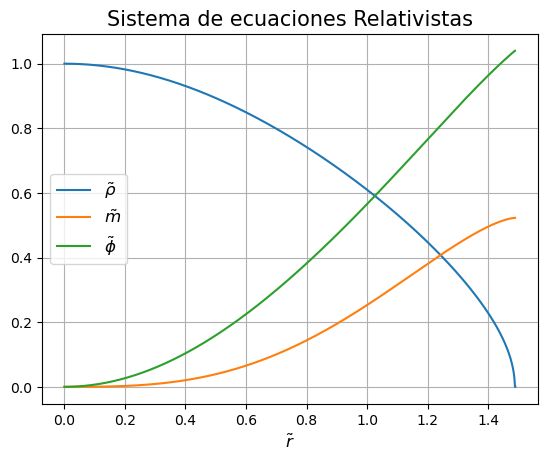

In [11]:
# search the x where rho = 0
for i in range(len(x[:,0])):
    if x[i,0] <= 0:
        # print(r[i], x[i,0])
        lim = i
        break

# print(r[lim], x[lim,0])
print('R={:.5f} rho={:.5f}'.format(r[lim-1], x[lim-1,0]))

# plot
plt.plot(r[:lim+1], x[:lim+1,0], label=r'$\tilde{\rho}$')
plt.plot(r[:lim], x[:lim,1], label=r'$\tilde{m}$')
plt.plot(r[:lim], x[:lim,2], label=r'$\tilde{\phi}$')

# plt.plot(r, k*(x[:,0])**gamma, label='P')
# plt.plot(r, x[:,0], label='rho')
# plt.plot(r, x[:,1], label='m')
# plt.plot(r, x[:,2], label='phi')
# plt.plot(r, k*(x[:,0])**gamma, label='P')
plt.xlabel('$\\tilde{r}$', fontsize=12)
plt.title('Sistema de ecuaciones Relativistas', fontsize=15)
plt.legend(fontsize=12)
plt.grid()
plt.show()

In [12]:
# considerig different gamma
gammas = np.arange(0.8, 1.7, 0.1)
xi = [odeint(RelOdes, x_0, r, args=(i,)) for i in gammas]

C:\Users\nicom\AppData\Local\Temp\ipykernel_25328\347593805.py:16: RuntimeWarning: invalid value encountered in scalar power
  drho_dr = -1/gamma * rho**(2-gamma)*m/r**2 * (1 + l* rho**(gamma-1)) * (1 + l* rho**gamma*r**3/m) / (1 - l* 2*m/r)
C:\Users\nicom\AppData\Local\Temp\ipykernel_25328\347593805.py:18: RuntimeWarning: invalid value encountered in scalar power
  dphi_dr = m/r**2 * (1 + rho**gamma*r**3/m) / (1 - 2*m/r)


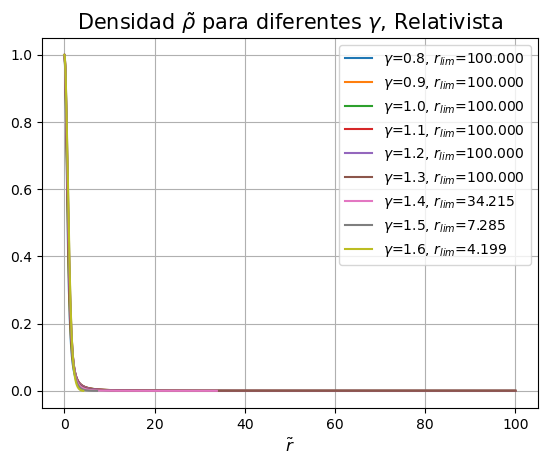

In [13]:
# plot for different gamma
for i in range(len(xi)):
    # search the x where rho = 0
    lim_ = len(r)
    for j in range(len(xi[i][:,0])):
        if xi[i][j,0] <= 0:
            lim_ = j
            break

    # plt.plot(r, xi[i][:,0], label='$\gamma$={}, $r_{{lim}}$={}'.format(gammas[i], r[lim_-1]))
    plt.plot(r[:lim_], xi[i][:lim_,0], label='$\gamma$={:.1f}, $r_{{lim}}$={:.3f}'.format(gammas[i], r[lim_-1])) # plot til limit
    # plt.plot(r[lim_-1], xi[i][lim_-1,0], 'o')# plot last point
plt.xlabel('$\\tilde{r}$', fontsize=12)
plt.title('Densidad $\\tilde{\\rho}$ para diferentes $\\gamma$, Relativista', fontsize=15)
plt.legend()
plt.grid()
plt.show()

# Relación entre parámetros y escalas de adimencionalización

k_sun = 0.0051


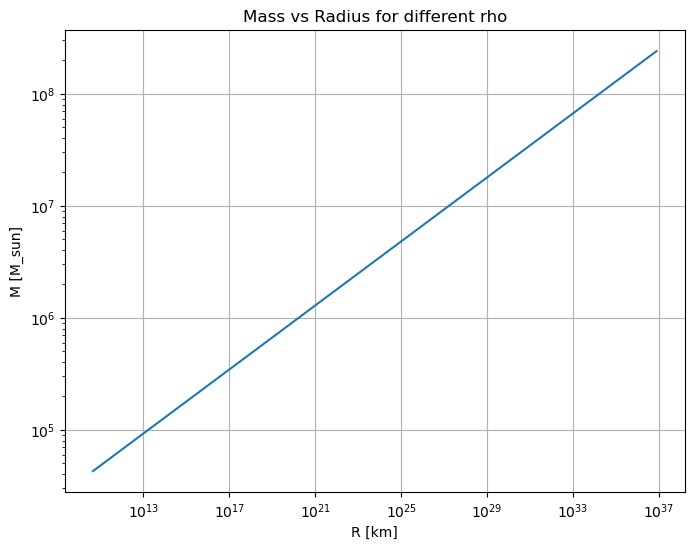

In [48]:
# Estimación de un k con datos del sol
gamma_sun = 2.5
k_sun = (P_0/(rho_0*c**2))**(1/gamma_sun)

print(f'k_sun = {round(k_sun,5)}')

# Parametros de Masa y Radio como función de la densidad central
def M_R(rho_0):
    R = (k_sun*rho_0**(gamma_sun-2)/(4*np.pi*G))**(1/2)
    M = 4*np.pi*rho_0*R**3
    return R, M

# Densidades centrales
rho_0s = np.logspace(0, 15, 200)*c**2
# rho_0s = np.linspace(1e5, 1e7, 100)
R, M = np.array([M_R(rho_0)[0] for rho_0 in rho_0s]), np.array([M_R(rho_0)[1] for rho_0 in rho_0s])

# Plot
plt.figure(figsize=(8,6))
plt.loglog(M/const.M_sun.value, R*10**(-3))
plt.xlabel('R [km]')
plt.ylabel('M [M_sun]')
plt.title('Mass vs Radius for different rho')
plt.grid(True)
plt.show()

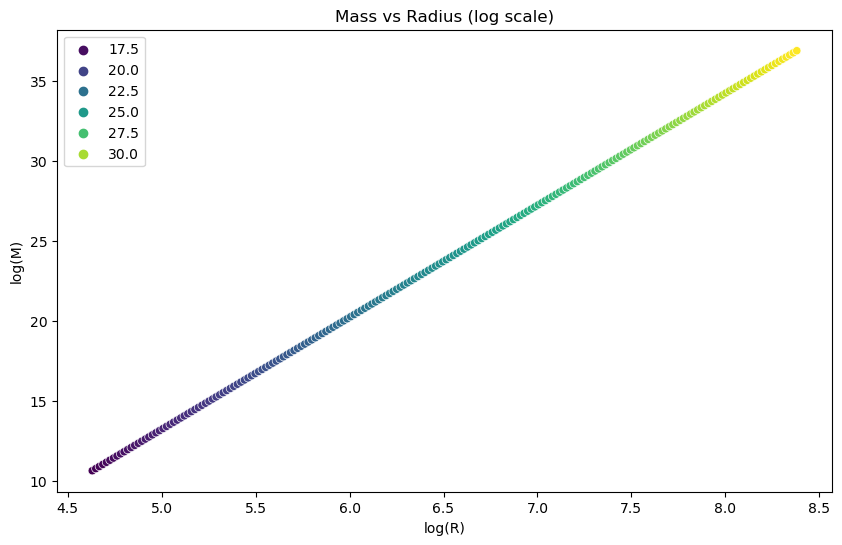

In [50]:
import seaborn as sns

# Create the plot
# sns.set_theme('darkgrid')
plt.figure(figsize=(10, 6))
sns.scatterplot(x=np.log10(R/10**3), y=np.log10(M/const.M_sun.value), hue=np.log10(rho_0s), palette="viridis")

# Set labels and title
plt.xlabel("log(R)")
plt.ylabel("log(M)")
plt.title("Mass vs Radius (log scale)")

# Add color map for hue
# cbar = plt.colorbar()
# cbar.set_label("rho_0s")

# Show the plot
plt.show()